Instructions
1. Load and Explore the Dataset
Objective: Load the dataset and examine its structure.
Tasks:
• Load the digits dataset from the sklearn.datasets library.
• Display the shape of X (feature data) and y (label data) to under tand
the dataset’s dimensions.
• Randomly split the dataset into training and test sets, reserving 0 sam-
ples for the tt set.
1
• Display the shapes of X train, y train, X test, and y test  o confirm
the correct split.
Rubric (15 points)
• Correctly load and display shapes of X and y: 3 points
• Implement a random split with 500 test samples: 8 points
• Display and verify shapes of X train, y train, X test  and y test: 4
points

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import pandas as pd

# Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Displaying shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Randomly split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 500, random_state = 40)

# Display shapes to confirm split
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X: (1797, 64)
Shape of y: (1797,)
Shape of X_train: (1297, 64)
Shape of y_train: (1297,)
Shape of X_test: (500, 64)
Shape of y_test: (500,)


2. Visualize Training Data
Objective: Become familiar with the images in the dataset.
Tasks:
• Select 10 random images from X train and their corresponding lab ls
from y train.
• Display these images in a grid using matplotlib, with each image la eled
with its corresponding digit. Use grayscale to emphasize pixel intensity.
Rubric (10 points)
• Correctly select and display 10 random images from X train: 5 points
• Display labels accurately and clearly: 3 points
• Proper use of grayscale and clean layout of images: 2 points

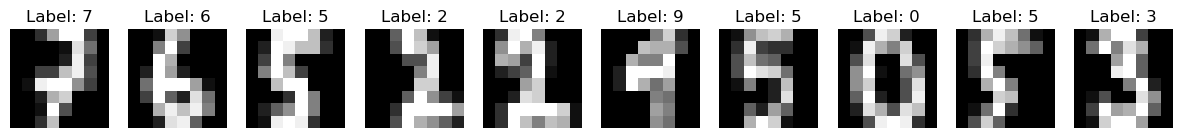

In [37]:
# 10 random images from X_train / displaying them
indices = np.random.choice(X_train.shape[0], 10, replace = False)
fig, axis = plt.subplots(1, 10, figsize = (15, 8))
for i, subplot in enumerate(axis):
    subplot.imshow(X_train[indices[i]].reshape(8, 8), cmap = 'gray')
    subplot.set_title("Label: " + str(y_train[indices[i]]))
    subplot.axis('off')
plt.show()

3. Implement the k-Nearest Neighbor Classifier
Objective: Train multiple k-NN classifiers to predict digit labels.
Tasks:
• Use sklearn’s KNeighborsClassifier to create and train a k-NN clai-
fier.
• Train five separate classifiers with k = 1, 3, 5, 7, and 9.
• For each classifier, fit the model using X train and y train.
Rubric (30 points)
• Correctly implement and train each classifier with specified values of k: 6
points per classifier (30 points total)

In [39]:
kVals = [1, 3, 5, 7, 9]
classifiers = {}

# Train k-NN classifier for each k val
for k in kVals:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    classifiers[k] = knn

4. Evaluate and Compare Classifiers
Objective: Compare classifier performance for different values of k using F 
scores.
Tasks:
• For each trained classifier (one per k value), predict the labels of X  est
and calculate the F1 score using y test as the ground truth.
• Use the f1 score function from sklearn.metrics with average=’wei hted’
to account for class distribution.
• Display the F1 scores in a table (using Markdown or pandas.Da aFrame)
for each k value.
• Summarize findings in a Markdown cell, discussing any patterns or trends
observed across different k values, including changes in F1 scores.
Rubric (25 points)
• Correctly calculate F1 scores for each classifier: 3 points p r classifier
(15 points total)
• Create a clear, organized table for F1 scores: 5 points
• Insightful discussion on the impact of different k values on performance:
5 points

In [41]:
# Calculate F1 scores for each classifier
f1Scores = {}
for k, model in classifiers.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    f1Scores[k] = f1

# Display F1 scores
results = pd.DataFrame(list(f1Scores.items()), columns = ['k', 'F1 Score'])
print("F1 Scores for different k vals:")
print(results)

F1 Scores for different k vals:
   k  F1 Score
0  1  0.981906
1  3  0.981918
2  5  0.975748
3  7  0.973615
4  9  0.967478


Our F1 scores show a minimal decrease as k increases, showing a gradual decrease in performance with higher k vals.

5. Visualize Qualitative Predictions
Objective: Evaluate classifier predictions qualitatively.
Tasks:
• For each classifier (with k = 1, 3, 5, 7, 9), select a few random images f om
X test to display predictions.
• Display each image with its predicted label and true label, annot ting
each plot with the classifier’s k value.
• In a concluding Markdown cell, reflect on the results, noting y pat-
terns or obser
    ations, especially for cases where predictions were correct
or i
correct.
Rubric (20 points)
• Correctly select random test samples and display images for each  lassifier:
10 points
• Clear and accurate labeling of predictions and true labels: 10 points

In [44]:
samples = 5
randIndices = np.random.choice(X_test.shape[0], samples, replace=False)
fig, grid = plt.subplots(len(kVals), samples, figsize = (10, 10))
plt.subplots_adjust(hspace = 1, left = .2)
for i, k in enumerate(kVals):
    for j, index in enumerate(randIndices):
        true_label = y_test[index]
        pred_label = classifiers[k].predict([X_test[index]])[0]
        grid[i, j].imshow(X_test[index].reshape(8, 8), cmap = 'gray')
        grid[i, j].set_title("True: " + str(true_label) + "\nPred: " + str(pred_label), fontsize = 10)
        grid[i, j].axis('off')
# k labels on the leftmost side
for i, k in enumerate(kVals):
    fig.text(0.05, 1 - (i + 0.5) / len(kVals), "k = " + str(k), ha = 'center', va = 'center', fontsize = 12)
plt.show()


Analysis and Observations: A summary of findings on how k impacts 
model performance, supported by both F1 scores and qualitative predi
tions.

Digits like 0,1,2,3 are easily predicited by our model, maybe because of their distinct features. As k value goes up our F1 score declines, leading to misclassifications of other digits like 9 or 8. We can see the trade off between sensitivity and stability with differnt values of k for this model.